In [1]:
import keras
import tensorflow as tf
import numpy as np

In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [5]:
print(training_images[3])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.12941176 0.37647059 0.68627451 0.61176471
  0.25098039 0.05490196 0.21176471 0.5372549  0.8        0.76078431
  0.4        0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.28627451 0.72941176 0.69411765 0.71764706 0.68627451 0.7372549
  0.90980392 1.         0.8745098  0.85882353 0.76078431 0.70196078
  0.72941176 0.83529412 0.57254902 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.1372549
  0.63921569 0.54901961 0.58823529 0.59607843 0.58823529 0.57254902
  0.68627451 0.68627451 0.67843137 0.67058824 0.61176471 0.59607843
  0.58039216 0.50588235 0.61176471 0.54901961 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.58823529
  0.55686275 0.54

In [6]:
print(training_labels[3])

3


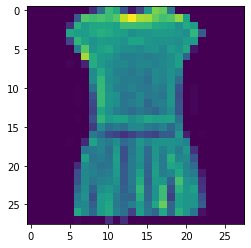

In [7]:
import matplotlib.pyplot as plt
plt.imshow(training_images[3])
plt.show()

In [8]:
callbacks = myCallback()

### DNN Model consisting of: 1 flatten and 2 dense layer(1 for i/p and 1 for o/p) along with relu and softmax AF

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Adam Optimizer with sparse categrical crossentropy loss function

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### We are using callback to feed o/p of one training model to next one until accuracy is reached to 95%, therefore though our epoch is 30 it eneded when accuracy is reached 95%.

In [11]:
history = model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4756 - accuracy: 0.8305
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3591 - accuracy: 0.8681
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3214 - accuracy: 0.8814
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2992 - accuracy: 0.8896
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2789 - accuracy: 0.8956
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2653 - accuracy: 0.9004
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2516 - accuracy: 0.9073
Epoch 8/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2415 - accuracy: 0.9086
Epoch 9/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2297 - accuracy: 0.9140
Epoch 10/30
1875/1875 [==============================] - 12s 7ms/step - l

In [13]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.40123283863067627
Test accuracy: 0.891700029373169


In [16]:
predictions = model.predict(test_images)
print("Predicted Probabilities -\n",predictions[5])
pred_labels = np.argmax(predictions,axis=1)
print("\nPredicted Class [Highest Prob] -",pred_labels[:4])

Predicted Probabilities -
 [5.5903967e-15 1.0000000e+00 5.9771298e-16 2.2427217e-14 4.1446948e-15
 1.6652799e-25 1.7188649e-15 2.1916535e-38 2.2381380e-24 2.7514876e-31]

Predicted Class [Highest Prob] - [9 2 1 1]


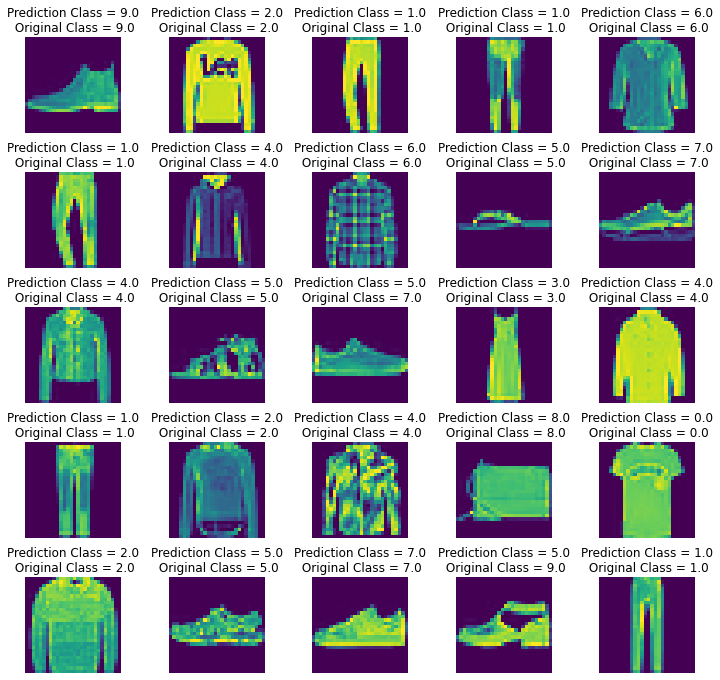

In [17]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(test_images[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {pred_labels[i]:0.1f}\n Original Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels) * 100

89.17